## Complete ML Cycle

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Dataset

In [75]:
df = pd.read_csv('./disease.csv')
df

,gender,city,age,bp,cough,disease
0,Male,Lahore,60.0,low,Moderate,Yes
1,NaN,Islamabad,27.0,low,Mild,No
2,Male,Islamabad,NaN,normal,Strong,No
3,Female,Lahore,31.0,high,Moderate,Yes
4,Female,Karachi,65.0,high,Mild,No
...,...,...,...,...,...,...
95,Female,Shaikhupura,NaN,normal,Mild,No
96,Female,Lahore,51.0,high,Strong,Yes
97,Female,Shaikhupura,20.0,normal,Mild,No
98,Female,Karachi,5.0,low,Moderate,No


### Data Analysis

In [76]:
df.shape

(100, 6)

In [77]:
# will show the statistics of numeric data columns
df.describe()

,age
count,87.000000
mean,44.655172
std,28.515124
min,-66.000000
25%,22.500000
50%,46.000000
75%,68.500000
max,131.000000


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gender   99 non-null     object 
 1   city     100 non-null    object 
 2   age      87 non-null     float64
 3   bp       100 non-null    object 
 4   cough    100 non-null    object 
 5   disease  100 non-null    object 
dtypes: float64(1), object(5)
memory usage: 4.8+ KB


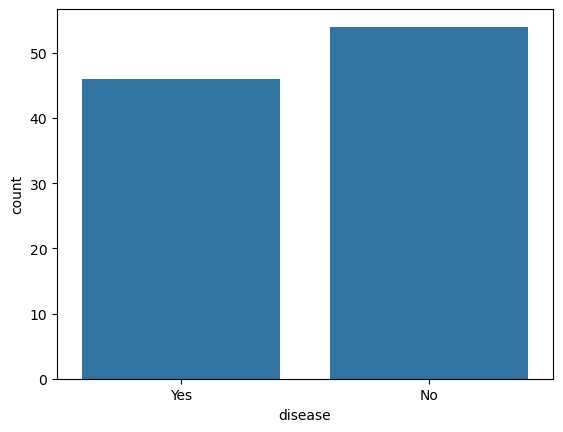

In [79]:
sns.countplot(x='disease', data=df)
plt.show()

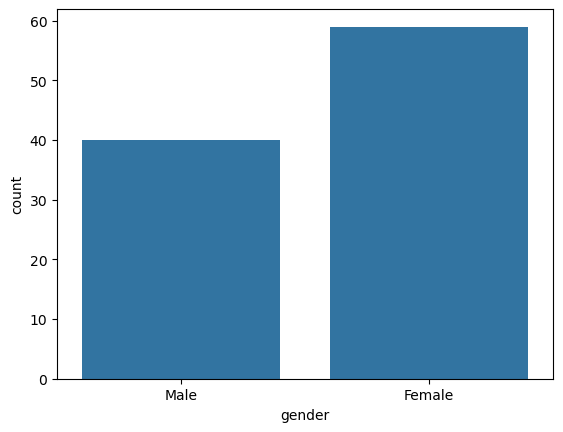

In [80]:
sns.countplot(x='gender', data=df)
plt.show()

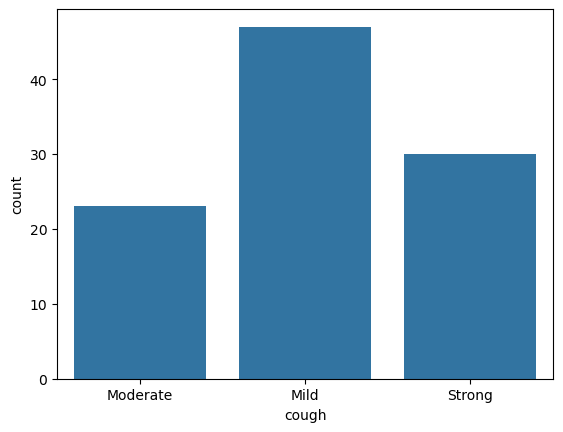

In [81]:
sns.countplot(x='cough', data=df)
plt.show()

### Data Preprocessing

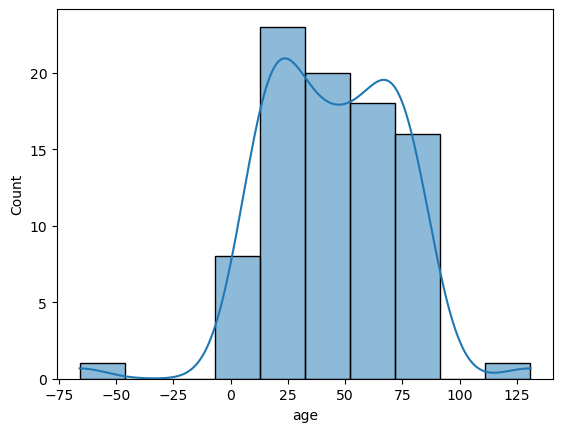

In [82]:
# Detecting an OUTLIER
sns.histplot(df['age'], kde=True)
plt.show()

In [83]:
# remove the outliers that u + 3std, u - 3std
age_mu = df.age.mean()
age_std = df.age.std()

In [84]:
upper_limit = age_mu + 3*age_std
lower_limit = age_mu - 3*age_std

print(lower_limit, upper_limit)

-40.89019815072107 130.20054297830728


In [85]:
indexes = df[(df['age']>upper_limit) | (df['age']<lower_limit)].index
indexes

Index([6, 59], dtype='int64')

In [86]:
df.drop(indexes, inplace=True)

In [87]:
df

,gender,city,age,bp,cough,disease
0,Male,Lahore,60.0,low,Moderate,Yes
1,NaN,Islamabad,27.0,low,Mild,No
2,Male,Islamabad,NaN,normal,Strong,No
3,Female,Lahore,31.0,high,Moderate,Yes
4,Female,Karachi,65.0,high,Mild,No
...,...,...,...,...,...,...
95,Female,Shaikhupura,NaN,normal,Mild,No
96,Female,Lahore,51.0,high,Strong,Yes
97,Female,Shaikhupura,20.0,normal,Mild,No
98,Female,Karachi,5.0,low,Moderate,No


In [88]:
df.isna().sum()

gender      1
city        0
age        13
bp          0
cough       0
disease     0
dtype: int64

In [92]:
df['age'].fillna(age_mu, inplace=True)

C:\Users\Muhammad Umer\AppData\Local\Temp\ipykernel_6936\2166103632.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(age_mu, inplace=True)


In [93]:
df.isna().sum()

gender     1
city       0
age        0
bp         0
cough      0
disease    0
dtype: int64

In [94]:
df['gender'].fillna(df.gender.mode()[0], inplace=True)

C:\Users\Muhammad Umer\AppData\Local\Temp\ipykernel_6936\2751975836.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].fillna(df.gender.mode()[0], inplace=True)


In [95]:
df.isna().sum()

gender     0
city       0
age        0
bp         0
cough      0
disease    0
dtype: int64

### Encoding Categorical Features

In [107]:
y = df['disease']
X = df.iloc[:,:-1]

In [110]:
gender_city = X[['gender', 'city']]
bp_cough = X[['bp', 'cough']]

In [111]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder

In [113]:
oe = OrdinalEncoder(categories=[['low', 'normal', 'high'],['Mild', 'Moderate', 'Strong']])
arr_bp_cough = oe.fit_transform(bp_cough)

In [118]:
ohe = OneHotEncoder(sparse_output=False, drop='first')
arr_gender_city = ohe.fit_transform(gender_city)

In [120]:
arr_age = df.age.values.reshape(-1,1)
arr_age

array([[60.        ],
       [27.        ],
       [44.65517241],
       [31.        ],
       [65.        ],
       [84.        ],
       [44.65517241],
       [19.        ],
       [64.        ],
       [75.        ],
       [65.        ],
       [25.        ],
       [44.65517241],
       [51.        ],
       [70.        ],
       [69.        ],
       [40.        ],
       [44.65517241],
       [42.        ],
       [12.        ],
       [73.        ],
       [71.        ],
       [80.        ],
       [13.        ],
       [44.65517241],
       [19.        ],
       [33.        ],
       [16.        ],
       [34.        ],
       [15.        ],
       [44.65517241],
       [34.        ],
       [26.        ],
       [74.        ],
       [44.65517241],
       [38.        ],
       [55.        ],
       [49.        ],
       [44.65517241],
       [49.        ],
       [82.        ],
       [27.        ],
       [22.        ],
       [20.        ],
       [72.        ],
       [44

In [135]:
X = np.concatenate([arr_age, arr_bp_cough, arr_gender_city], axis=1)
X

array([[60.        ,  0.        ,  1.        ,  1.        ,  0.        ,
         1.        ,  0.        ],
       [27.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [44.65517241,  1.        ,  2.        ,  1.        ,  0.        ,
         0.        ,  0.        ],
       [31.        ,  2.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ],
       [65.        ,  2.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ],
       [84.        ,  2.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ],
       [44.65517241,  1.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  0.        ],
       [19.        ,  2.        ,  2.        ,  0.        ,  0.        ,
         0.        ,  1.        ],
       [64.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [75.        ,  0.    

In [130]:
from sklearn.model_selection import train_test_split

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=7, stratify=y)

### Model Training

In [142]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X, y)

LogisticRegression()

In [146]:
y_predict = lr.predict(X_test)

<Axes: >

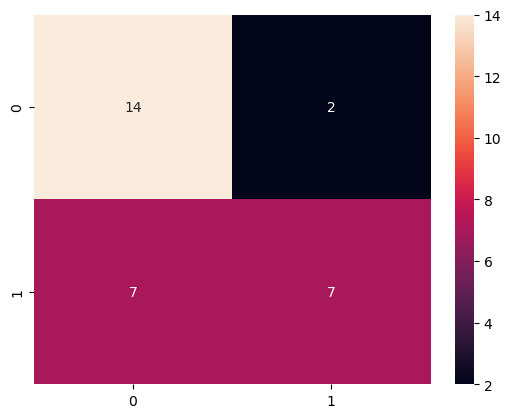

In [147]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, fmt='g', annot=True)